In [1]:
import sys
sys.path.append('../code')

In [10]:
import cPickle as pickle
import pandas as pd
import numpy as np

from sklearn.cross_validation import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score, roc_curve

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [32]:
from add_model_features import add_features
from model_utilities import *

In [18]:
patch_draft_dfs = get_all_dfs('../data')

In [19]:
gbr = GradientBoostingRegressor(loss='lad')
y_test, y_old, predictions = one_patch_predictor(patch_draft_dfs, '6.86', gbr, 'regressor')

In [23]:
mse_dict = {}
gbr = GradientBoostingRegressor(loss='lad')
for key in patch_draft_dfs.iterkeys():
    y_test, y_old, predictions = one_patch_predictor(patch_draft_dfs, key, gbr, 'regressor')
    mse_dict[key] = (mean_squared_error(y_test, y_old), mean_squared_error(y_test, predictions))

In [24]:
mse_dict

{'6.78': (372.54178217821777, 359.04179610080581),
 '6.79': (469.03205882352944, 352.01696841434693),
 '6.80': (540.77529411764715, 418.80490287131573),
 '6.81': (313.62901960784313, 316.38481520441877),
 '6.82': (351.7853846153846, 295.05320866368845),
 '6.83': (573.19261682242984, 429.54855056906666),
 '6.84': (636.64851851851859, 447.50871269682727),
 '6.85': (437.96112149532706, 460.88139636997198),
 '6.86': (275.51773584905652, 202.69366400700744)}

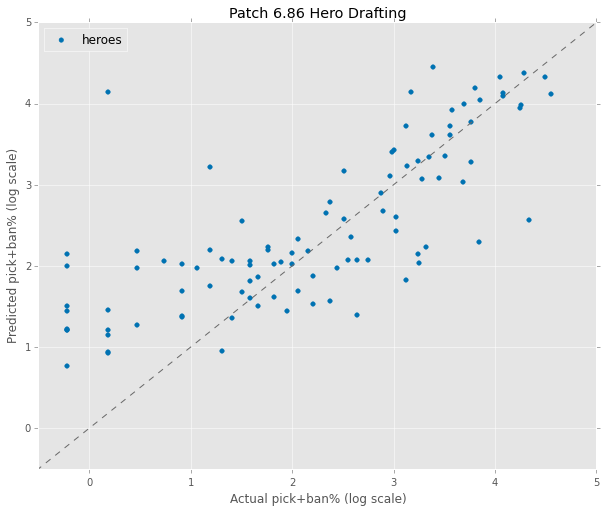

In [134]:
gbr = GradientBoostingRegressor(loss='lad')
y_test, y_old, predictions = one_patch_predictor(patch_draft_dfs, '6.86', gbr, 'regressor')
plot_scatter(y_test, predictions, '6.86', rescale=True, log=True)

In [121]:
auc_dict = {}
gbc = GradientBoostingClassifier()
for key in patch_draft_dfs.iterkeys():
    y_test, y_old, predictions = one_patch_predictor(patch_draft_dfs, key, gbc, 'classifier', threshold=50)
    auc_dict[key] = roc_auc_score(y_test, predictions)

In [122]:
auc_dict

{'6.78': 0.81434108527131788,
 '6.79': 0.77088122605363996,
 '6.80': 0.64490740740740737,
 '6.81': 0.68369565217391293,
 '6.82': 0.79765395894428148,
 '6.83': 0.60618556701030935,
 '6.84': 0.69635627530364375,
 '6.85': 0.73567921440261852,
 '6.86': 0.83161512027491402}

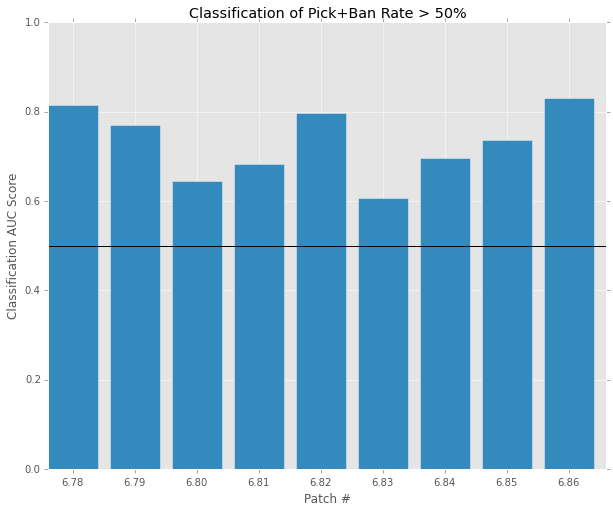

In [125]:
plt.figure(figsize=(10,8))
plt.ylim(0, 1)
plt.axhline(y=0.5, color='black', linestyle='-')
plt.bar(range(len(auc_dict)), [auc_dict[key] for key in sorted(auc_dict.keys())])
plt.xticks(np.arange(len(auc_dict))+0.4, sorted(auc_dict.keys()))
plt.xlabel('Patch #')
plt.ylabel('Classification AUC Score')
plt.title('Classification of Pick+Ban Rate > 50%')
plt.show()

In [123]:
np.mean(auc_dict.values())

0.73125727853800493